# Principal Component Analysis (PCA)

- Principal Component Analysis (PCA) is a well-known unsupervised dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation. 
- The new variables correspond to a linear combination of the originals. The number of principal components is less than or equal to the number of original variables.
- The information in a given data set corresponds to the total variation it contains. The goal of PCA is to identify directions (or principal components) along which the variation in the data is maximal. In other words, PCA reduces the dimensionality of a multivariate data to two or three principal components, that can be visualized graphically, with minimal loss of information.
- Each principal component represents a percentage of total variation captured from the data.

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

In [3]:
# Importing csv file and creating dataframe
bm = pd.read_csv('bank-additional-full.csv', delimiter=';')

# Changing target variable to a dummy variable
bm['deposit'] = bm.y.map({'no':0, 'yes':1})
bm.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


## Standardization
- Standardization of a dataset is a common requirement for many machine learning technique including PCA 

In [4]:
# All non numeric variables and "pdays" column because of having too many observations equal to 999 - means 
# client was not previously contacted - are not included in new dataframe
# We also remove the target variable 'y' from the PCA computation, but we will add it again to the output

bm2 = bm[['age','duration','campaign','previous','emp.var.rate','cons.price.idx','cons.conf.idx',
         'euribor3m','nr.employed']]
bm_t = pd.DataFrame(data = bm, columns = ['deposit'])

# Standardize the variables

scaler = StandardScaler()
scaler.fit(bm2)
bm_scaled = scaler.transform(bm2)

## PC Analysis
- Next lines of code will be projecting the nine-dimensional data to three-dimensional principal components.
- We applied the sklearn library to import the PCA module, and in the PCA method, the number of components is passed to 3 and finally calling fit_transform on it in order to aggregate data. Here, several components represent the lower dimension in which will project the higher dimension data.

In [5]:
pca = PCA(n_components=3)
pca.fit(bm_scaled)
bm_pca_ = pca.fit_transform(bm_scaled)
print('Shape of dataframe before dimensional reduction: ', bm_scaled.shape)
print('Shape of dataframe after dimensional reduction: ', bm_pca_.shape)

Shape of dataframe before dimensional reduction:  (41188, 9)
Shape of dataframe after dimensional reduction:  (41188, 3)


In [7]:
# Creating a dataframe of principal components and target variable

bm_pca = pd.DataFrame(data = bm_pca_, columns = ['PCA_1','PCA_2','PCA_3'])
bm_pca = pd.concat([bm_pca, bm_t], axis=1)
bm_pca.head()

,PCA_1,PCA_2,PCA_3,deposit
0,-1.277794,1.707244,0.033658,0
1,-1.288162,1.728169,-0.321000,0
2,-1.276956,0.462549,0.369582,0
3,-1.284391,0.627542,0.078179,0
4,-1.273623,1.725259,0.169821,0


- Now that we have the principal components, we can find the explained variance ratio. It will provide the amount of information or variance that each principal component holds after projecting the data to a lower dimensional.

In [8]:
print('Explained variation per principal component: ', pca.explained_variance_ratio_)

Explained variation per principal component:  [0.42 0.13 0.12]


## Interpretation of results
- From the above output, we can observe that the PCA_1 holds %42 of the information while the PCA_2 and PCA_3 hold %13 and %12 of the information, respectively. Also, the other point to note is that while projecting nine-dimensional data to a three-dimensional data, %33 information was lost.

In [9]:
# Adding target variable to bm dataframe

bm3 = pd.concat([bm2, bm_t], axis=1)
bm3.head()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0


## Correlation Matrix before and after Principal Component Analysis

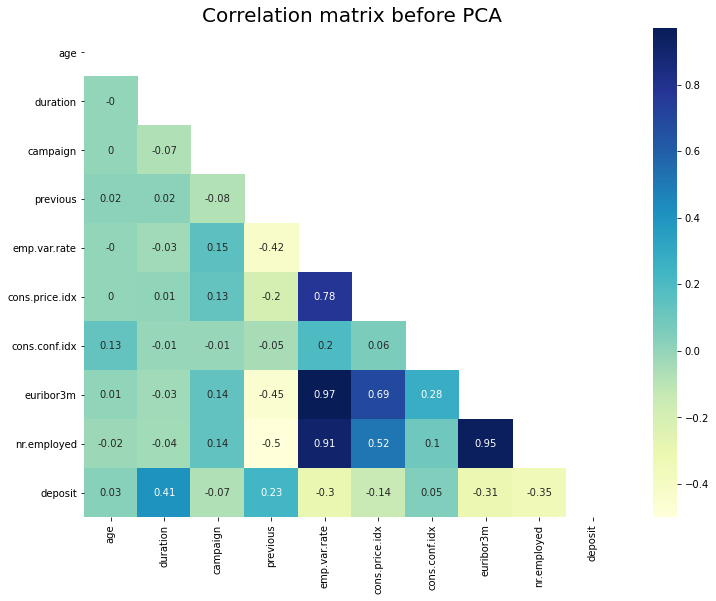

In [10]:
# Correlation matrix before PCA

plt.figure(figsize=(12,9))
mask = np.triu(np.ones_like(bm3.corr()))
corr_matrix1 = bm3.corr()
corr_matrix1 = round(corr_matrix1,2)
sns.heatmap(corr_matrix1, cmap = 'YlGnBu', annot = True, mask=mask)
plt.title('Correlation matrix before PCA', fontsize=20);

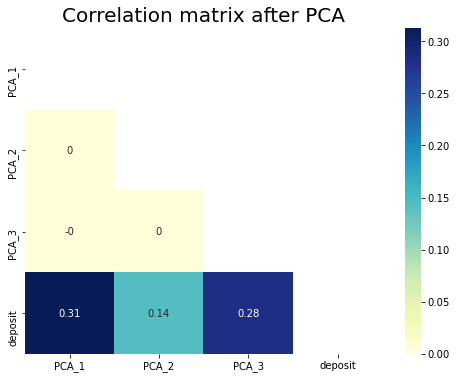

In [11]:
# Correlation matrix after PCA

plt.figure(figsize=(8,6))
mask = np.triu(np.ones_like(bm_pca.corr()))
corr_matrix2 = bm_pca.corr()
corr_matrix2 = round(corr_matrix2,3)
sns.heatmap(corr_matrix2, cmap = 'YlGnBu', annot = True, mask=mask)
plt.title('Correlation matrix after PCA', fontsize=20);

## Feature contribution
- The contribution of each feature is reflected by the magnitude of the corresponding values in the eigenvectors (higher magnitude — higher contribution).

In [12]:
# Finding the most important features

print(abs(pca.components_))

[[0.00 0.02 0.10 0.28 0.51 0.39 0.12 0.51 0.48]
 [0.68 0.10 0.23 0.13 0.00 0.05 0.67 0.06 0.07]
 [0.24 0.77 0.58 0.03 0.04 0.07 0.06 0.04 0.03]]


## Interpretation of results
- Considering age, duration, campaign, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed as features number 1 to 9, we can conclude:
- Feature 5, 8 and 9 are the most important features for PCA_1. 
- Feature 1 and 7 are the most important features for PCA_2.
- Feature 2, 3 and 1 are the most important features for PCA_3.

## Logestic regression before and after Principal Component Analysis

In [13]:
# Logestic regression before PCA using Statsmodels

y_b = bm3['deposit']
x1_b = bm2
x_b = sm.add_constant(x1_b)
reg_log_before = sm.Logit(y_b,x_b)
results_log_before = reg_log_before.fit()
results_log_before.summary()

Optimization terminated successfully.
         Current function value: 0.226325
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                deposit   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41178
Method:                           MLE   Df Model:                            9
Date:                Wed, 08 Sep 2021   Pseudo R-squ.:                  0.3571
Time:                        16:55:49   Log-Likelihood:                -9321.9
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -33.3305     15.383     -2.167      0.030     -63.481      -3.180
age                0.0016      0.002      0.994      0.320      -0.002       0.005
duration           0.0046   7.13e-05     63.888      0.000       0.004       0.005
campaign          -0.0431      0.011     -3.808      0.000      -0.065      -0.021
previous           0.1995      0.029      6.788      0.000       0.142       0.257
emp.var.rate      -0.6540      0.066     -9.888      0.000      -0.784      -0.524
cons.price.idx     0.7169      0.098      7.299      0.000       0.524       0.909
cons.conf.idx      0.0426      0.006      7.435      0.000       0.031       0.054
euribor3m          0.0560      0.083      0.677      0.498      -0.106       0.218
nr.employed       -0.0070      0.001     -4.951      0.000      -0.010      -0.004
==================================================================================
"""

In [14]:
# Logestic regression after PCA using Statsmodels

y_a = bm_pca['deposit']
x1_a = bm_pca[['PCA_1','PCA_2','PCA_3']]
x_a = sm.add_constant(x1_a)
reg_log_after = sm.Logit(y_a,x_a)
results_log_after = reg_log_after.fit()
results_log_after.summary()

Optimization terminated successfully.
         Current function value: 0.240534
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                deposit   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41184
Method:                           MLE   Df Model:                            3
Date:                Wed, 08 Sep 2021   Pseudo R-squ.:                  0.3167
Time:                        16:55:53   Log-Likelihood:                -9907.1
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0226      0.028   -107.527      0.000      -3.078      -2.967
PCA_1          0.6427      0.011     60.717      0.000       0.622       0.663
PCA_2          0.4918      0.015     32.663      0.000       0.462       0.521
PCA_3          1.3002      0.022     60.169      0.000       1.258       1.343
==============================================================================
"""

## Comparing two models using confusion matrix
- Comparing two models can be done by calculating accuracy of each model in predicting target variable

### Accuracy of logestic regression model before PCA

In [15]:
# A prediction table (confusion matrix)  

results_log_before.pred_table()
cm_df = pd.DataFrame(results_log_before.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,35702.0,846.0
Actual 1,3060.0,1580.0


In [17]:
# Calculate the accuracy of the model

cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
print('Accuracy of logestic regression model before PCA: ', accuracy_train)

Accuracy of logestic regression model before PCA:  0.9051665533650578


### Accuracy of logestic regression model after PCA

In [18]:
# A prediction table (confusion matrix)  

results_log_after.pred_table()
cm_df = pd.DataFrame(results_log_after.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,35758.0,790.0
Actual 1,3347.0,1293.0


In [19]:
# Calculate the accuracy of the model

cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
print('Accuracy of logestic regression model after PCA: ', accuracy_train)

Accuracy of logestic regression model after PCA:  0.8995581237253569


## Interpretation of results
- The overall accuracy of both regression models before and after applying Principal Component Analysis are very close but with this slight difference that the model with all numeric features can predict outpot better, when target is 'yes' and tne model with three-dimensional features can predict outpot better, when target is 'no'

# K-Means Clustering

- The K-Means clustering method is an unsupervised machine learning technique used to identify clusters of data objects in a dataset. There are many different types of clustering methods, but k-means is one of the oldest and most approachable. The goal of K-Means algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. 
- In this section the popular KMeans machine learning package sfrom cikit-learn has been applied to do cluster analysis.

## Features included in the model
- The following two features have been selected for K-Mean analysis:
- 1) euribor3m: euribor 3 month rate - daily indicator (euribor is the basic rate of interest used in lending between banks on the European Union interbank market and also used as a reference for setting the interest rate on other loans).
- 2) cons.price.idx: consumer price index - monthly indicator (numeric)

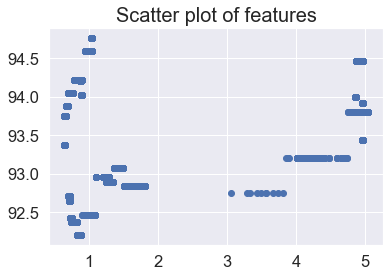

In [21]:
# Defining dataframe
sns.set(font_scale=1.5)
x = bm[['euribor3m','cons.price.idx']]

# Ploting data 
plt.scatter(x['euribor3m'],x['cons.price.idx'])
plt.title('Scatter plot of features', fontsize=20);

## Feature Scaling
- The process of transforming numerical features to use the same scale is known as feature scaling. It’s an important data preprocessing step for most distance-based machine learning algorithms because it can have a significant impact on the performance of the algorithm.
- There are several approaches to implementing feature scaling. In this section, we use scale method from preprocessing class in sklearn. This class implements a type of feature scaling called standardization. Standardization scales, or shifts, the values for each numerical feature in the dataset so that the features have a mean of 0 and standard deviation of 1:

In [22]:
# Standardize the variables
x_scaled = preprocessing.scale(x)
x_scaled

array([[0.71, 0.72],
       [0.71, 0.72],
       [0.71, 0.72],
       ...,
       [-1.50, 2.06],
       [-1.50, 2.06],
       [-1.50, 2.06]])

## K-Means analysis with four clusters
- The K-Means algorithm is run with k = 3. The number of clusters is approved by the Elbow Method in the next part.
- The new dataframe created with clusters, contains the original values but predicted clusters are based on standardized data.

In [28]:
# Clustering
kmeans = KMeans(4)
kmeans.fit(x_scaled)
data_with_clusters = x.copy()
data_with_clusters['Cluster'] = kmeans.fit_predict(x_scaled)
data_with_clusters = data_with_clusters.reset_index(drop=True)
data_with_clusters.head()

,euribor3m,cons.price.idx,Cluster
0,4.857,93.994,1
1,4.857,93.994,1
2,4.857,93.994,1
3,4.857,93.994,1
4,4.857,93.994,1


## Visualisation
- The scatter plot of clustered features reperesents three seperated clusters with different colors. 

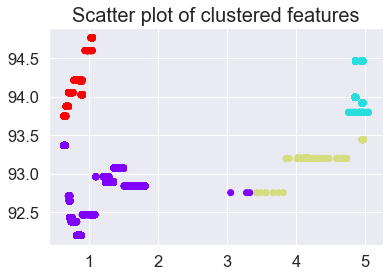

In [29]:
# Ploting clustered data 
plt.scatter(data_with_clusters['euribor3m'],data_with_clusters['cons.price.idx'],
            c=data_with_clusters['Cluster'],cmap='rainbow')
plt.title('Scatter plot of clustered features', fontsize=20);

## Choosing the Appropriate Number of Clusters
- In the following, we used elbow method method that is commonly used to evaluate the appropriate number of clusters:
- In order to perform the elbow method, k-means alghorithm will be run several times and each time k increments by 1. In each iteration the SSE is recorded and will be showed on a plot along with cluster numbers.

In [30]:
# WCSS
wcss = []
for i in range(1,8):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[82376.00000001078,
 23726.389103973004,
 13702.683546947994,
 6375.165455948046,
 3796.693453880032,
 2018.4498812760899,
 1122.7523241686138]

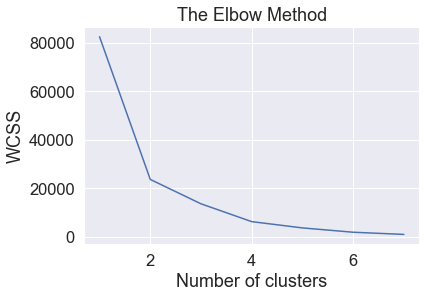

In [32]:
number_clusters = range(1,8)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Interpretation of results
- Considering the elbow method, the number of four is the best number for this cluster analysis

### References:
- https://machinelearningmastery.com/principal-components-analysis-for-dimensionality-reduction-in-python/
- https://realpython.com/k-means-clustering-python/ 